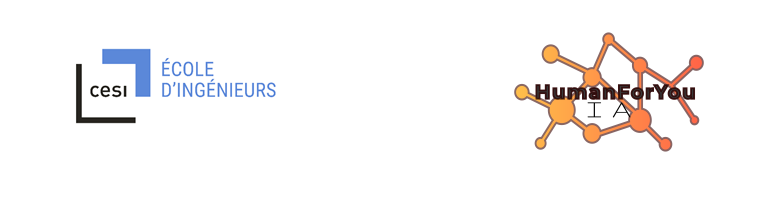

# Présentation du projet 

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.


# Data Wrangling

La première étape de notre projet sera de découvrir, structurer, nettoyer, enrichir nos données. 

Pour cela nous allons dans un premier temps, préparer nos environnement de développement, puis importer nos données à partir des CSV fournis. Nous avons décidé de fusionner toutes ces données dans un unique tableau de données afin de les analyser plus facilement.

## Imports python généraux

Pour effectuer cette analyse nous allons avoir besoin de différentes bibliothèques :
    
* __OS__ : Pour gérer nos intéractions avec les fichiers de données
* __pandas__ : Pour travailler avec des __dataframe__
* __datetime__ : Si nous devons intéragir avec des dates
* __matplotlib__ : Pour afficher des données de manière plus graphique


## Préparation de l'Environnement


In [1]:
import numpy as np
import os

from numpy.random import default_rng
random=default_rng(42) 

In [2]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import des Données

On récupère les différentes données des CSV puis les regroupons dans les cas où cela semble pertinent:

* Les informations générales
* Les informations sur l'enquête employé
* Les informations sur l'enquête des managers

In [3]:
import pandas as pd
datasets = "datasets"
def load_data(file,Datasets=datasets):
    csv_path = os.path.join(Datasets, str(file))
    return pd.read_csv(csv_path)

In [4]:
general_data = load_data("general_data.csv")
employee_survey_data = load_data("employee_survey_data.csv")
in_time = load_data("in_time.csv")
manager_survey_data = load_data("manager_survey_data.csv")
out_time = load_data("out_time.csv")

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
### traiting data
general_data_traiting = general_data.copy()
general_data_traiting.drop("BusinessTravel",axis =1 ,inplace = True)
general_data_traiting.drop("Education",axis =1 ,inplace = True)
general_data_traiting.drop("EducationField",axis =1 ,inplace = True)
general_data_traiting.drop("Over18",axis =1 ,inplace = True)


In [6]:
##On remarque que  15-TotalWorkingYears a des valeurs manquantes 
##On remplace ces dernieres avec le median
median = general_data_traiting["TotalWorkingYears"].median()
general_data_traiting["TotalWorkingYears"].fillna(median, inplace=True)

In [7]:
employee_survey_data_traiting = employee_survey_data.copy()
median = employee_survey_data_traiting["EnvironmentSatisfaction"].median()
employee_survey_data_traiting["EnvironmentSatisfaction"].fillna(median, inplace=True)
median = employee_survey_data_traiting["JobSatisfaction"].median()
employee_survey_data_traiting["JobSatisfaction"].fillna(median, inplace=True)
median = employee_survey_data_traiting["WorkLifeBalance"].median()
employee_survey_data_traiting["WorkLifeBalance"].fillna(median, inplace=True)
num_attribs = list(employee_survey_data_traiting)
employee_survey_data_traiting.drop("EmployeeID",axis =1 ,inplace = True)


## Transformation des données de temps

Transformons ensuite les __chaines de caractères__ en __datatime__  :


In [8]:
for date in in_time.columns:
    in_time[date]=pd.to_datetime(in_time[date],errors='ignore',format='%Y-%m-%d %H:%M:%S')
    out_time[date]=pd.to_datetime(out_time[date],errors='ignore',format='%Y-%m-%d %H:%M:%S')

Nous disposons maintenant d'objets __datetime__, ce qui nous permets d'effectuer des opérations :

* Soustraire le out_time et le in_time pour obtenir la valeur exacte de temps passé au travail __par jour__
* Faire une __moyenne pour chaque employé__

In [9]:
work = (out_time-in_time)
work_mean_time = work.mean(axis=1)

### Fusion CSV

Les données general_info, manager_survey et employee_survey sont stockées dans des csv différents. Pour traiter l'ensemble des données plus facilement, nous allons fusionner ces csv sur la colonne EmployeeID.
De plus on ajoute la colonne du nombre d'heures de travail par jour.


In [10]:
manager_survey_data_traiting = manager_survey_data.copy()
manager_survey_data_traiting.drop("EmployeeID",axis =1 ,inplace = True)

In [11]:
frames = [general_data_traiting, manager_survey_data_traiting, employee_survey_data_traiting ,work_mean_time]
main_data = pd.concat(frames ,axis=1)
main_data.rename( columns={0:'WorkMeanTime'}, inplace=True )

In [12]:
main_data["WorkMeanTime"] = work_mean_time.dt.total_seconds()/60/60
main_data.drop("EmployeeID", axis=1, inplace=True) 


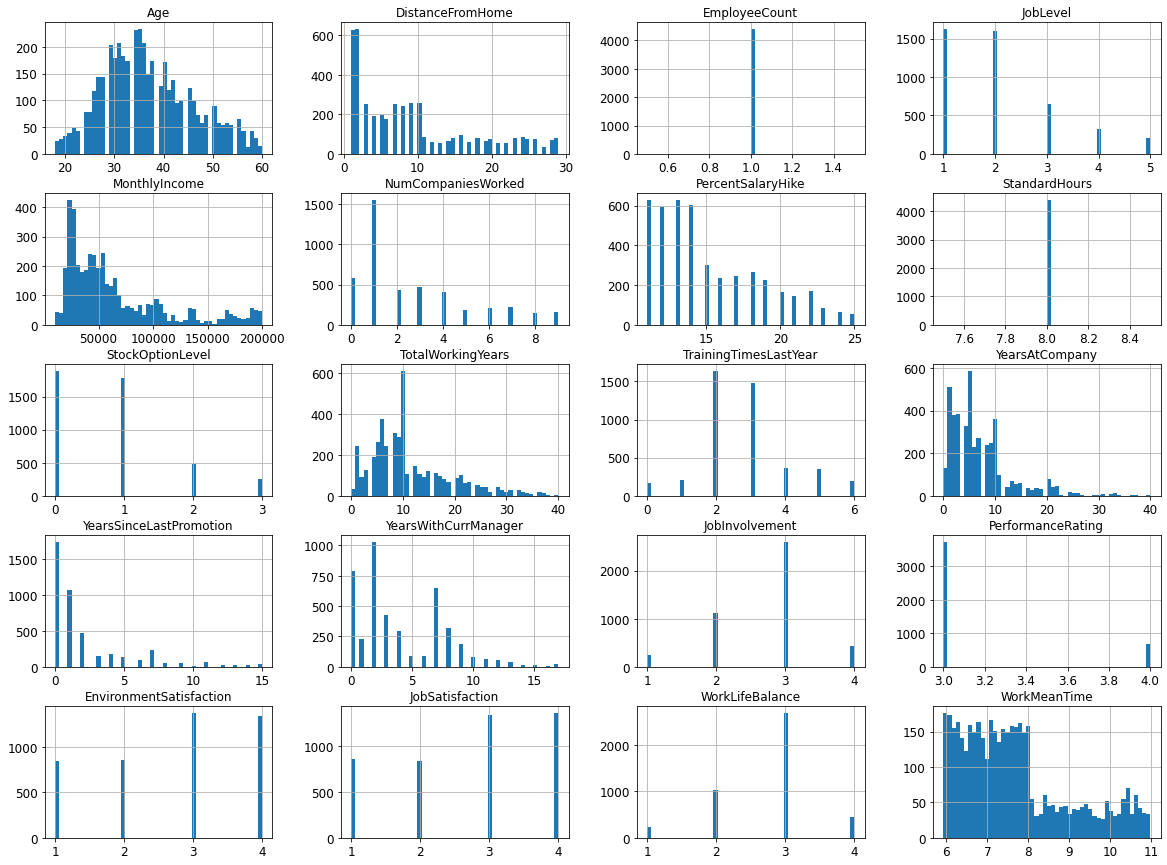

In [13]:
main_data.hist(bins=50, figsize=(20,15)) 
plt.show()

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = main_data.copy()
X.drop("Attrition", axis=1, inplace=True) 
X.drop("Department", axis=1, inplace=True) 
X.drop("Gender", axis=1, inplace=True) 
X.drop("JobRole", axis=1, inplace=True) 
X.drop("MaritalStatus", axis=1, inplace=True) 
X.drop("NumCompaniesWorked", axis=1, inplace=True) 
X.drop("TotalWorkingYears", axis=1, inplace=True) 
X.drop("EnvironmentSatisfaction", axis=1, inplace=True) 
X.drop("JobSatisfaction", axis=1, inplace=True) 
X.drop("WorkLifeBalance", axis=1, inplace=True) 
X.drop("WorkMeanTime", axis=1, inplace=True) 


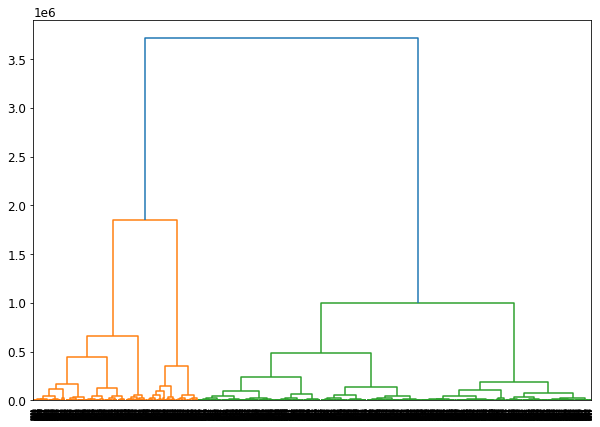

In [20]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [21]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [14]:
train_set, test_set = split_train_test(main_data, 0.2)

In [15]:
local_df_train = train_set.copy()
local_df_test = test_set.copy()

In [16]:
y_train_set = local_df_train["Attrition"]
y_train_set = y_train_set.eq('Yes').mul(1)
x_train_set = local_df_train.copy()
x_train_set.drop("Attrition", axis=1, inplace=True)


y_test_set = local_df_test["Attrition"]
y_test_set = y_test_set.eq('Yes').mul(1)
x_test_set= local_df_test.copy()
x_test_set.drop("Attrition", axis=1, inplace=True)



## Pipeline de transformation de données quantitatives
Nous créons un pipeline pour remplacer toutes nos valeurs non renseignées par la médiane de l'attribut à l'aide de _SimpleImputer_. Nous devons mettre nos données à la même échelle pour faciliter l'analyse, pour cela nous utilisons _StandardScaler_.

## Pipeline de transformation de données qualitatives
Nous devons numériser nos données qualitives afin de pouvoir les analyser et les utiliser dans nos futurs modèles. Pour cela, deux choix s'offrent à nous, OrdinaleEncoder et OneHotEncoder. 

- OrdinalEncoder : Donne une valeur numérique à chaque catégorie (ex: ['pomme, poire, banane] => [0,1,2])
- OneHotEncoder : Chaque catégorie va donner naissance à une nouvelle variable booléenne (ex: ['pomme, poire, banane] => [[1,0,0],[0,1,0],[0,0,1]])

Par conséquent, nous avons choisi d'utiliser OneHotEncoder, car certain algorithme de ML peuvent considérer que des valeurs numériques telles que  0  et  1  sont plus proches l'une de l'autre que ne le sont  0  et  2 . Ce n'est a priori pas vrai ici si on mappe les catégories trivialement sur [0,1,2]. Le 1-hot encoding palie ce problème. 

In [18]:
##Standarization
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


main_data_num = main_data.select_dtypes(include=[np.number]) 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = list(main_data_num)
cat_attribs= [ "Department", "Gender",  "JobRole", "MaritalStatus"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
         ("cat", OneHotEncoder(), cat_attribs),
    ])

x_train = full_pipeline.fit_transform(x_train_set)
x_test = full_pipeline.fit_transform(x_test_set)
y_test = y_test_set
y_train = y_train_set

x_1 = main_data.copy()
x_1.drop("Attrition", axis=1, inplace=True)
x = full_pipeline.fit_transform(x_1)

y = main_data["Attrition"]
y = y.eq('Yes').mul(1)

In [28]:
np.save('variables/x.npy', x)
np.save('variables/y.npy', y)
np.save('variables/x_train.npy', x_train)
np.save('variables/x_test.npy', x_test)
np.save('variables/y_test.npy', y_test)
np.save('variables/y_train.npy', y_train)

## Entrainement et Tests de Différents Modèles

Afin de trouver le modèle offrant les meilleures performances dans notre cas, nous allons en tester plusieurs et selectionner le modèle aillant les meileurs résultats.
Les modèles testés sont :
* La regression Logistique
* Le Perceptron
* La Descente de Gradient Stochastique
* Le Random Forest Classifier
* MLP 
* C-SVC 

In [32]:
x_1.to_pickle('variables/x_1')
x_test_set.to_pickle('variables/x_test_set')
x_train_set.to_pickle('variables/x_train_set')
main_data.to_pickle('variables/main_data')